In [2]:
import pandas as pd

In [5]:
World_ranking_universities = pd.read_csv(r"C:\Users\user\Downloads\WorldRankUniversities Dataset\Dataset\WorldUniversity.csv")

World_ranking_universities.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [6]:
World_ranking_universities.columns = [col.title() for col in World_ranking_universities.columns]
World_ranking_universities.head()

,World_Rank,Institution,Country,National_Rank,Quality_Of_Education,Alumni_Employment,Quality_Of_Faculty,Publications,Influence,Citations,Broad_Impact,Patents,Score,Year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
World_ranking_universities.shape

(2200, 14)

Finding Missing Values

In [5]:
World_ranking_universities.isnull().sum()

World_Rank                0
Institution               0
Country                   0
National_Rank             0
Quality_Of_Education      0
Alumni_Employment         0
Quality_Of_Faculty        0
Publications              0
Influence                 0
Citations                 0
Broad_Impact            200
Patents                   0
Score                     0
Year                      0
dtype: int64

Remove Duplicates

In [6]:
World_ranking_universities = World_ranking_universities.drop_duplicates()
World_ranking_universities.head()

,World_Rank,Institution,Country,National_Rank,Quality_Of_Education,Alumni_Employment,Quality_Of_Faculty,Publications,Influence,Citations,Broad_Impact,Patents,Score,Year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Filling Missing Values
Handling Inconsistencies

In [7]:
import statistics

for i in World_ranking_universities.columns :
    if World_ranking_universities[i].dtype == 'object' :
        m = World_ranking_universities[i].mode()[0]
        World_ranking_universities[i] = World_ranking_universities[i].fillna(m)
    else :
        me = World_ranking_universities[i].mean()
        World_ranking_universities[i] = World_ranking_universities[i].fillna(me)


World_ranking_universities.head()

,World_Rank,Institution,Country,National_Rank,Quality_Of_Education,Alumni_Employment,Quality_Of_Faculty,Publications,Influence,Citations,Broad_Impact,Patents,Score,Year
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [8]:
World_ranking_universities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World_Rank            2200 non-null   int64  
 1   Institution           2200 non-null   object 
 2   Country               2200 non-null   object 
 3   National_Rank         2200 non-null   int64  
 4   Quality_Of_Education  2200 non-null   int64  
 5   Alumni_Employment     2200 non-null   int64  
 6   Quality_Of_Faculty    2200 non-null   int64  
 7   Publications          2200 non-null   int64  
 8   Influence             2200 non-null   int64  
 9   Citations             2200 non-null   int64  
 10  Broad_Impact          2200 non-null   float64
 11  Patents               2200 non-null   int64  
 12  Score                 2200 non-null   float64
 13  Year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [9]:
import pyodbc as odbc

In [10]:
import pandas as pd           
from sqlalchemy import create_engine  
import re                    
import matplotlib.pyplot as plt  
import sqlalchemy as sa

In [11]:
def create_connection(server, database):
    connection_string = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
    engine = create_engine(connection_string)
    
    return engine


engine = create_connection("DESKTOP-2G9VGB9\SQLEXPRESS", "World_ranking_universities")

# Push data to SQL Server
World_ranking_universities.to_sql(
    name="WorldUniversityRank",
    con=engine,
    if_exists="replace",   # or "append" if table exists and you want to add rows
    index=False
)

114

In [12]:
import sqlalchemy as sa

with engine.begin() as conn:
    result = pd.read_sql_query(sa.text("SELECT TOP 10 * FROM WorldUniversity"), conn)
    print(result)

   World_Rank                            Institution         Country  \
0           1                     Harvard University             USA   
1           2                    Stanford University             USA   
2           3  Massachusetts Institute of Technology             USA   
3           4                University of Cambridge  United Kingdom   
4           5                   University of Oxford  United Kingdom   
5           6                    Columbia University             USA   
6           7     University of California, Berkeley             USA   
7           8                  University of Chicago             USA   
8           9                   Princeton University             USA   
9          10                        Yale University             USA   

   National_Rank  Quality_Of_Education  Alumni_Employment  Quality_Of_Faculty  \
0              1                     1                  1                   1   
1              2                    11       

SQL Questions

1) Retrieve all columns for universities in the USA.

In [13]:
with engine.begin() as conn:
 df_sql = pd.read_sql_query(sa.text("select * from WorldUniversityRank where country = 'USA'"),
conn)
 print(df_sql)

     World_Rank                            Institution Country  National_Rank  \
0             1                     Harvard University     USA              1   
1             2  Massachusetts Institute of Technology     USA              2   
2             3                    Stanford University     USA              3   
3             5     California Institute of Technology     USA              4   
4             6                   Princeton University     USA              5   
..          ...                                    ...     ...            ...   
568         901     University of Southern Mississippi     USA            225   
569         906                     Oakland University     USA            226   
570         913             University of North Dakota     USA            227   
571         929         University of Texas at El Paso     USA            228   
572         936       University of California, Merced     USA            229   

     Quality_Of_Education  

2) Find the top 10 universities with the highest scores
in 2012.

In [14]:
with engine.begin() as conn:
 df_top10 = pd.read_sql_query(sa.text(" SELECT TOP 10 Institution,Country,Score,Year FROM WorldUniversityRank WHERE Year = 2012 ORDER BY Score DESC"),
conn)
 print(df_top10)

                             Institution         Country   Score  Year
0                     Harvard University             USA  100.00  2012
1  Massachusetts Institute of Technology             USA   91.67  2012
2                    Stanford University             USA   89.50  2012
3                University of Cambridge  United Kingdom   86.17  2012
4     California Institute of Technology             USA   85.21  2012
5                   Princeton University             USA   82.50  2012
6                   University of Oxford  United Kingdom   82.34  2012
7                        Yale University             USA   79.14  2012
8                    Columbia University             USA   78.86  2012
9     University of California, Berkeley             USA   78.55  2012


3) List universities in the United Kingdom with a score
above 80 in 2013.

In [15]:
with engine.begin() as conn:
 df_Score = pd.read_sql_query(sa.text("select Institution, Country, Score, year from WorldUniversityRank where Country = 'United Kingdom' and score > 80 and Year = 2013"),
conn)
 print(df_Score)

               Institution         Country  Score  year
0     University of Oxford  United Kingdom  92.54  2013
1  University of Cambridge  United Kingdom  90.24  2013


4) Count the number of universities in each country.

In [16]:
with engine.begin() as conn:
 countOfUniversities = pd.read_sql_query(sa.text("select Country, Count(Institution) as NumberofUniversity from WorldUniversityRank group by Country"),
conn)
 print(countOfUniversities)

                 Country  NumberofUniversity
0              Argentina                   7
1              Australia                  58
2                Austria                  24
3                Belgium                  20
4                 Brazil                  36
5               Bulgaria                   2
6                 Canada                  72
7                  Chile                   8
8                  China                 167
9               Colombia                   4
10               Croatia                   2
11                Cyprus                   2
12        Czech Republic                  10
13               Denmark                  12
14                 Egypt                   8
15               Estonia                   2
16               Finland                  20
17                France                 109
18               Germany                 115
19                Greece                  14
20             Hong Kong                  12
21        

5) Calculate the average score for universities in each
country in 2014.

In [17]:
with engine.begin() as conn:
 AvgOfUniversities = pd.read_sql_query(sa.text("Select Country,Institution,AVG(Score)as AverageScore from WorldUniversityRank Where Year=2014 group by Country,Institution"),
conn)
 print(AvgOfUniversities)

     Country                         Institution  AverageScore
0    Finland             Ã…bo Akademi University         44.65
1     France               Ã‰cole Centrale Paris         45.03
2     France  Ã‰cole normale supÃ©rieure - Paris         59.72
3     France  Ã‰cole normale supÃ©rieure de Lyon         45.25
4     France                Ã‰cole Polytechnique         59.54
..       ...                                 ...           ...
995   Taiwan                  Yuan Ze University         44.32
996    China          Zhejiang Normal University         44.26
997    China                 Zhejiang University         47.76
998    China   Zhejiang University of Technology         44.28
999    China                Zhengzhou University         44.49

[1000 rows x 3 columns]


6) Find universities with a quality_of_education score
greater than 20.

In [18]:
with engine.begin() as conn:
 quality_of_education = pd.read_sql_query(sa.text("Select Institution,Quality_Of_Education from WorldUniversityRank where Quality_Of_Education > 20"),
conn)
 print(quality_of_education)

                          Institution  Quality_Of_Education
0                 Columbia University                    23
1                  Cornell University                    21
2          University of Pennsylvania                    31
3                 University of Tokyo                    32
4            Johns Hopkins University                    34
...                               ...                   ...
2121        University of the Algarve                   367
2122            Alexandria University                   236
2123     Federal University of CearÃ¡                   367
2124          University of A CoruÃ±a                   367
2125  China Pharmaceutical University                   367

[2126 rows x 2 columns]


7) Retrieve universities with a score between 70 and 80.

In [19]:
with engine.begin() as conn:
 Score = pd.read_sql_query(sa.text("select Institution,Score from WorldUniversityRank where Score between 70 and 80"),
conn)
 print(Score)

                                        Institution  Score
0                                   Yale University  79.14
1                               Columbia University  78.86
2                University of California, Berkeley  78.55
3                             University of Chicago  73.82
4                                Cornell University  73.69
5                        University of Pennsylvania  73.64
6                             University of Chicago  79.16
7                                   Yale University  78.83
8                California Institute of Technology  77.59
9                        University of Pennsylvania  77.24
10                               Cornell University  76.99
11                              University of Tokyo  76.23
12                       University of Pennsylvania  79.30
13            University of California, Los Angeles  78.35
14                                 Kyoto University  73.21
15                              New York University  72.

8) List the top 5 universities with the highest alumni
employment scores in 2012.

In [20]:
with engine.begin() as conn:
 highest_alumni_employment = pd.read_sql_query(sa.text("select Top 5 Institution,Alumni_Employment from WorldUniversityRank where Year = 2012 order by Alumni_Employment Desc"),
conn)
 print(highest_alumni_employment)

                                    Institution  Alumni_Employment
0                 Weizmann Institute of Science                101
1           University of California, San Diego                101
2                        Rockefeller University                101
3       University of California, San Francisco                101
4  University of Illinois at Urbanaâ€“Champaign                101


9) Find the university with the highest quality_of_faculty in 2013.

In [21]:
with engine.begin() as conn:
 highest_quality_of_faculty = pd.read_sql_query(sa.text("select Top 1 Institution,Quality_Of_Faculty as Highest_quality_of_faculty, year From WorldUniversityRank Where Year=2013 order by Quality_Of_Faculty desc"),
conn)
 print(highest_quality_of_faculty)

               Institution  Highest_quality_of_faculty  year
0  Northwestern University                         101  2013


10) Count the number of universities that have a
national_rank less than 5.

In [22]:
with engine.begin() as conn:
 less_rank = pd.read_sql_query(sa.text("select Institution,count(Institution) as Count_of_Universities,National_Rank from WorldUniversityRank where National_Rank < 5 group by Institution,National_Rank"),
conn)
 print(less_rank)

                            Institution  Count_of_Universities  National_Rank
0    Ã‰cole normale supÃ©rieure - Paris                      1              1
1                  Ã‰cole Polytechnique                      1              1
2         American University of Beirut                      2              1
3                      Cairo University                      2              1
4          Charles University in Prague                      2              1
..                                  ...                    ...            ...
241   Victoria University of Wellington                      2              4
242     Vienna University of Technology                      1              4
243     Warsaw University of Technology                      1              4
244                   Waseda University                      2              4
245                 Zhejiang University                      1              4

[246 rows x 3 columns]


11) Retrieve universities with a quality_of_education rank equal to 1.

In [23]:
with engine.begin() as conn:
 qualityofeducation_Rank = pd.read_sql_query(sa.text("select Institution,Quality_Of_Education from WorldUniversityRank where Quality_Of_Education = 1"),
conn)
 print(qualityofeducation_Rank)

              Institution  Quality_Of_Education
0  Rockefeller University                     1
1      Harvard University                     1
2      Harvard University                     1
3      Harvard University                     1


12) List the top 10 universities with the highest
citations in 2014.

In [24]:
with engine.begin() as conn:
 highestCitations = pd.read_sql_query(sa.text("select Top 10 Institution,Citations from WorldUniversityRank where Year=2014 Order by Citations Desc"),
conn)
 print(highestCitations)

                            Institution  Citations
0        National Cheng Kung University        800
1                    Leipzig University        800
2  Indian Institute of Technology Delhi        800
3                 University of Navarra        800
4                    Tianjin University        800
5                  Cranfield University        800
6             Xi'an Jiaotong University        800
7           Chonbuk National University        800
8                  King Saud University        800
9                     Sogang University        800


13) Calculate the average influence score for
universities in the USA.


In [25]:
with engine.begin() as conn:
 avg_influeance_score = pd.read_sql_query(sa.text("select Institution,Avg(Influence) As Average_Influeance_Score,Country from WorldUniversityRank where Country = 'USA' group by Institution,Country"),
conn)
 print(avg_influeance_score)

                          Institution  Average_Influeance_Score Country
0              Albany Medical College                       762     USA
1            Arizona State University                        91     USA
2                   Auburn University                       577     USA
3          Baylor College of Medicine                        40     USA
4                   Baylor University                       623     USA
..                                ...                       ...     ...
226       Western Michigan University                       815     USA
227                  Williams College                       101     USA
228  Wright State University - Dayton                       825     USA
229                   Yale University                         8     USA
230                Yeshiva University                        88     USA

[231 rows x 3 columns]


14) Find universities with a broad_impact rank less
than or equal to 50.


In [26]:
with engine.begin() as conn:
 broad_impact_rank = pd.read_sql_query(sa.text("select Institution,Broad_Impact from WorldUniversityRank where Broad_Impact <=50"),
conn)
 print(broad_impact_rank)

                                      Institution  Broad_Impact
0                              Harvard University           1.0
1                             Stanford University           4.0
2           Massachusetts Institute of Technology           2.0
3                         University of Cambridge          13.0
4                            University of Oxford          12.0
..                                            ...           ...
95                   Erasmus University Rotterdam          44.0
96                             Utrecht University          46.0
97  University of Texas MD Anderson Cancer Center          29.0
98                     Baylor College of Medicine          44.0
99                  University of Texas at Dallas          49.0

[100 rows x 2 columns]


15) Retrieve universities in Japan with a score greater
than 60 in 2012.

In [27]:
with engine.begin() as conn:
 JapanScore = pd.read_sql_query(sa.text("select Institution,Country,Score from WorldUniversityRank where Score > 60 and Year = 2012 and Country = 'Japan'"),
conn)
 print(JapanScore)

           Institution Country  Score
0  University of Tokyo   Japan  69.49
1     Kyoto University   Japan  65.76

16) List the top 5 universities with the highest patents
in 2013.


In [28]:
with engine.begin() as conn:
 highest_Patents = pd.read_sql_query(sa.text("select Top 5 Institution,Patents from WorldUniversityRank where Year = 2013 Order by Patents Desc"),
conn)
print(highest_Patents)

                               Institution  Patents
0                     Princeton University      101
1                    University of Chicago      101
2                    University of Toronto      101
3                  University of Paris-Sud      101
4  University of California, Santa Barbara      101


17) Count the number of universities with a
quality_of_faculty score between 5 and 10.

In [29]:
with engine.begin() as conn:
 CountofQualityOfFaculty = pd.read_sql_query(sa.text("select Institution,Quality_Of_faculty,Count(Institution) AS CountofUniversities from WorldUniversityRank where Quality_Of_faculty between 5 and 10 group by Institution,Quality_Of_faculty"),
conn)
 print(CountofQualityOfFaculty)

                          Institution  Quality_Of_faculty  CountofUniversities
0                 Stanford University                   5                    1
1             University of Cambridge                   5                    3
2  University of California, Berkeley                   6                    4
3  California Institute of Technology                   7                    4
4               University of Chicago                   8                    4
5                 Columbia University                   9                    3
6                University of Oxford                   9                    1
7                 Columbia University                  10                    1
8                University of Oxford                  10                    3


18) Calculate the average score for universities in the
United Kingdom in 2014.

In [30]:
with engine.begin() as conn:
 AvgScoreOfUK = pd.read_sql_query(sa.text("select Institution,Country,Avg(Score) AS AverageScore from WorldUniversityRank where Country='United Kingdom' and Year = 2014 group by Institution,Country"),
conn)
 print(AvgScoreOfUK)

                                 Institution         Country  AverageScore
0                     Aberystwyth University  United Kingdom         44.53
1                           Aston University  United Kingdom         44.63
2                          Bangor University  United Kingdom         44.95
3             Birkbeck, University of London  United Kingdom         44.76
4                          Brunel University  United Kingdom         45.50
..                                       ...             ...           ...
59                      University of Sussex  United Kingdom         48.12
60                      University of Ulster  United Kingdom         44.60
61  University of Wales, Trinity Saint David  United Kingdom         44.40
62                     University of Warwick  United Kingdom         46.13
63                        University of York  United Kingdom         45.99

[64 rows x 3 columns]


19) Find universities with a national_rank between 1
and 3 in 2012.

In [31]:
with engine.begin() as conn:
 nationalRank2012 = pd.read_sql_query(sa.text("select Institution,National_Rank,Year from WorldUniversityRank where National_Rank between 1 and 3 and Year = 2012"),
conn)
 print(nationalRank2012)

                                          Institution  National_Rank  Year
0                                  Harvard University              1  2012
1               Massachusetts Institute of Technology              2  2012
2                                 Stanford University              3  2012
3                             University of Cambridge              1  2012
4                                University of Oxford              2  2012
5                                 University of Tokyo              1  2012
6     Swiss Federal Institute of Technology in Zurich              1  2012
7                                    Kyoto University              2  2012
8                       Weizmann Institute of Science              1  2012
9                      Hebrew University of Jerusalem              2  2012
10                            Imperial College London              3  2012
11                                   Osaka University              3  2012
12                       

20) List universities with a citations rank less than 10.

In [32]:
with engine.begin() as conn:
 CitationRank = pd.read_sql_query(sa.text("select Institution,Citations from WorldUniversityRank where Citations < 10"),
conn)
 print(CitationRank)

                              Institution  Citations
0                      Harvard University          1
1   Massachusetts Institute of Technology          4
2                     Stanford University          2
3      University of California, Berkeley          3
4              University of Pennsylvania          8
5                Johns Hopkins University          9
6   University of California, Los Angeles          6
7       University of Michigan, Ann Arbor          7
8      University of Washington - Seattle          5
9                      Harvard University          1
10                    Stanford University          2
11  Massachusetts Institute of Technology          3
12     University of California, Berkeley          4
13             University of Pennsylvania          9
14  University of California, Los Angeles          6
15               Johns Hopkins University          7
16     University of Washington - Seattle          5
17      University of Michigan, Ann Arbor     

21) Retrieve the university with the highest
alumni_employment in 2013.

In [33]:
with engine.begin() as conn:
 HighestAlumniEmployment = pd.read_sql_query(sa.text("select Top 1 Institution,Alumni_Employment from WorldUniversityRank where Year = 2013 Order by Alumni_Employment Desc"),
conn)
 print(HighestAlumniEmployment)

                          Institution  Alumni_Employment
0  California Institute of Technology                101


22) Find the top 5 universities with the highest
publications in 2012.

In [34]:
with engine.begin() as conn:
 HighestPublicarions = pd.read_sql_query(sa.text("select Top 5 Institution,Publications from WorldUniversityRank where Year = 2012 Order by Publications Desc"),
conn)
 print(HighestPublicarions)

                                       Institution  Publications
0                    Weizmann Institute of Science           101
1                           Rockefeller University           101
2                   Hebrew University of Jerusalem           101
3  University of Texas Southwestern Medical Center           101
4                       Carnegie Mellon University           101


23) Count the number of universities in each year

In [35]:
with engine.begin() as conn:
 No_of_Universities = pd.read_sql_query(sa.text("select Year, Count(Institution)As NumberOfUniversities from WorldUniversityRank group by Year"),
conn)
 print(No_of_Universities)

   Year  NumberOfUniversities
0  2013                   100
1  2014                  1000
2  2012                   100
3  2015                  1000


24) Calculate the average alumni_employment score
for universities in the USA.


In [36]:
with engine.begin() as conn:
 AveargeAlumniEmployment = pd.read_sql_query(sa.text("select Avg(Alumni_Employment)AS AlumniEmploymentScore from WorldUniversityRank where Country='USA' "),
conn)
 print(AveargeAlumniEmployment)

   AlumniEmploymentScore
0                    257


25) Retrieve universities with a broad_impact score
greater than 70.

In [37]:
with engine.begin() as conn:
 BroadImpactScore = pd.read_sql_query(sa.text("select Institution,Broad_Impact from WorldUniversityRank where Broad_Impact > 70"),
conn)
 print(BroadImpactScore)

                                Institution  Broad_Impact
0                        Harvard University      496.6995
1     Massachusetts Institute of Technology      496.6995
2                       Stanford University      496.6995
3                   University of Cambridge      496.6995
4        California Institute of Technology      496.6995
...                                     ...           ...
2053              University of the Algarve      969.0000
2054                  Alexandria University      981.0000
2055           Federal University of CearÃ¡      975.0000
2056                University of A CoruÃ±a      975.0000
2057        China Pharmaceutical University      981.0000

[2058 rows x 2 columns]


26) List the top 10 universities with the highest
influence in 2014.

In [38]:
with engine.begin() as conn:
 Highest_Influence = pd.read_sql_query(sa.text("select Top 10 Institution,Influence from WorldUniversityRank where Year = 2014 Order by Influence Desc"),
conn)
 print(Highest_Influence)

                             Institution  Influence
0        National Chung Cheng University        987
1       Nanjing University of Technology        987
2                    Jadavpur University        987
3                   Feng Chia University        987
4  Northwestern Polytechnical University        987
5          Chung Shan Medical University        987
6            Beijing Jiaotong University        987
7        China Pharmaceutical University        987
8             Tarbiat Modares University        987
9  University of Pau and Pays de l'Adour        987


27) Find universities with a patents rank equal to 1

In [39]:
with engine.begin() as conn:
 PatentsRank = pd.read_sql_query(sa.text("select Institution,Patents from WorldUniversityRank where Patents = 1"),
conn)
 print(PatentsRank)

                             Institution  Patents
0  Massachusetts Institute of Technology        1
1  Massachusetts Institute of Technology        1
2  Massachusetts Institute of Technology        1
3  Massachusetts Institute of Technology        1


28) Count the number of universities with a
broad_impact between 20 and 30.

In [40]:
with engine.begin() as conn:
 CountOfUniversities = pd.read_sql_query(sa.text("select Institution,Count(Institution)As NumberOfUniversities from WorldUniversityRank where Broad_Impact Between 20 and 30 group by Institution"),
conn)
 print(CountOfUniversities)

                                      Institution  NumberOfUniversities
0              California Institute of Technology                     2
1                              Cornell University                     2
2                         Northwestern University                     2
3                       University College London                     1
4                           University of Chicago                     1
5            University of Minnesota, Twin Cities                     2
6     University of North Carolina at Chapel Hill                     2
7    University of Pittsburgh - Pittsburgh Campus                     2
8   University of Texas MD Anderson Cancer Center                     2
9                             University of Tokyo                     2
10              University of Wisconsinâ€“Madison                     2
11                                Yale University                     1


29) Calculate the average quality_of_faculty score for
universities in the United Kingdom.

In [41]:
with engine.begin() as conn:
 QualityofFacultyScore = pd.read_sql_query(sa.text("select Avg(Quality_Of_Faculty) As AvgQualityofFacultyScore from WorldUniversityRank where Country = 'United Kingdom'"),
conn)
 print(QualityofFacultyScore)

   AvgQualityofFacultyScore
0                       166


30) Find universities with an influence rank less than 5.

In [42]:
with engine.begin() as conn:
 InfluenceRank = pd.read_sql_query(sa.text("select Institution,Influence from WorldUniversityRank where Influence < 5"),
conn)
 print(InfluenceRank)

                                Institution  Influence
0                        Harvard University          1
1     Massachusetts Institute of Technology          4
2                       Stanford University          2
3   University of California, San Francisco          3
4                        Harvard University          1
5                       Stanford University          2
6     Massachusetts Institute of Technology          3
7   University of California, San Francisco          4
8                        Harvard University          1
9                       Stanford University          3
10    Massachusetts Institute of Technology          2
11       University of California, Berkeley          4
12                       Harvard University          1
13                      Stanford University          3
14    Massachusetts Institute of Technology          2
15       University of California, Berkeley          4


31) Retrieve universities with a score greater than 75
and a national_rank less than or equal to 10 in 2013.

In [43]:
with engine.begin() as conn:
 ScoreandNationalrank = pd.read_sql_query(sa.text("select Institution,Score,National_Rank from WorldUniversityRank where Score >75 and National_Rank <=10 and Year = 2013"),
conn)
 print(ScoreandNationalrank)

                              Institution   Score  National_Rank
0                      Harvard University  100.00              1
1                     Stanford University   93.94              2
2                    University of Oxford   92.54              1
3   Massachusetts Institute of Technology   91.45              3
4                 University of Cambridge   90.24              2
5                     Columbia University   88.21              4
6      University of California, Berkeley   85.07              5
7                    Princeton University   82.17              6
8                   University of Chicago   79.16              7
9                         Yale University   78.83              8
10     California Institute of Technology   77.59              9
11             University of Pennsylvania   77.24             10
12                    University of Tokyo   76.23              1


32) List the top 5 universities with the highest patents
in 2014.

In [44]:
with engine.begin() as conn:
 Highest_Patent2014 = pd.read_sql_query(sa.text("select Top 5 Institution,Patents from WorldUniversityRank where Year = 2014 Order by Patents Desc"),
conn)
 print(Highest_Patent2014)

                          Institution  Patents
0  Ã‰cole normale supÃ©rieure - Paris      737
1   Lomonosov Moscow State University      737
2                Karolinska Institute      737
3                     Lund University      737
4                  Uppsala University      737


33) Count the number of universities with an
alumni_employment score greater than 50.

In [45]:
with engine.begin() as conn:
 Countuniversities = pd.read_sql_query(sa.text("select Count(Institution) As No_Of_Universities from WorldUniversityRank where Alumni_Employment > 50"),
conn)
 print(Countuniversities)

   No_Of_Universities
0                2049


34) Calculate the average quality_of_education score
for universities in Japan.

In [46]:
with engine.begin() as conn:
 InfluenceRank = pd.read_sql_query(sa.text("select Avg(Quality_Of_education) As AvgQualityOfEducationScore from WorldUniversityRank where Country = 'Japan'"),
conn)
 print(InfluenceRank)

   AvgQualityOfEducationScore
0                         291


35) Find universities with a quality_of_education rank
equal to 1 in 2014.

In [47]:
with engine.begin() as conn:
 qualityOfeducationrank1 = pd.read_sql_query(sa.text("select Institution,Quality_Of_Education from WorldUniversityRank where Quality_Of_Education=1 and Year = 2014"),
conn)
 print(qualityOfeducationrank1)

          Institution  Quality_Of_Education
0  Harvard University                     1


36) Retrieve universities with a score greater than 80
and an alumni_employment rank less than 5.


In [48]:
with engine.begin() as conn:
 AlumniEmployemnt_Score = pd.read_sql_query(sa.text("select Institution,Score,Alumni_Employment from WorldUniversityRank where Score >80 and Alumni_Employment < 5"),
conn)
 print(AlumniEmployemnt_Score)

           Institution   Score  Alumni_Employment
0   Harvard University  100.00                  1
1  Stanford University   93.94                  2
2   Harvard University  100.00                  1
3  Stanford University   99.09                  2
4  University of Tokyo   80.64                  3
5   Harvard University  100.00                  1
6  Stanford University   98.66                  2


37) List the top 10 universities with the highest
publications in 2013.

In [49]:
with engine.begin() as conn:
 InfluenceRank = pd.read_sql_query(sa.text("select Top 10 Institution,Publications from WorldUniversityRank where Year = 2013 Order by Publications Desc"),
conn)
 print(InfluenceRank)

                                       Institution  Publications
0                   Hebrew University of Jerusalem           101
1                    Weizmann Institute of Science           101
2  University of Texas Southwestern Medical Center           101
3                           Rockefeller University           101
4                       Carnegie Mellon University           101
5                             University of Geneva           101
6               Ã‰cole normale supÃ©rieure - Paris           101
7      Technion â€“ Israel Institute of Technology           101
8                                  Keio University           101
9                         Arizona State University           101


38) Count the number of universities with a
broad_impact score between 40 and 50.

In [50]:
with engine.begin() as conn:
 Universities_BroadImapctScore = pd.read_sql_query(sa.text("select Count(Institution) As NoOfUniversities from WorldUniversityRank where Broad_Impact Between 40 and 50"),
conn)
 print(Universities_BroadImapctScore)

   NoOfUniversities
0                22


39) Calculate the average score for universities in
Australia.

In [51]:
with engine.begin() as conn:
 AustraliaScore = pd.read_sql_query(sa.text("select Avg(Score) As AvgScoreOfAustralia from WorldUniversityRank where Country = 'Australia'"),
conn)
 print(AustraliaScore)

   AvgScoreOfAustralia
0            45.825517


40) Find universities with an influence rank equal to 1
in 2012.

In [52]:
with engine.begin() as conn:
 InfluenceRankis1 = pd.read_sql_query(sa.text("select Institution,Influence from WorldUniversityRank where Influence = 1 and Year = 2012"),
conn)
 print(InfluenceRankis1)

          Institution  Influence
0  Harvard University          1


Task 5: Questions Using Python

1.What is the total number of records in the
dataset?

In [53]:
print("Total Number Of Records :", len(World_ranking_universities))


Total Number Of Records : 2200


2.How many columns are there in the dataset?

In [54]:
print("Total Number Of Columns :", len(World_ranking_universities.columns))

Total Number Of Columns : 14


3.What is the datatype of the "world_rank"
column?

In [55]:
#World_ranking_universities.head()

print(World_ranking_universities['World_Rank'].dtype)

int64


4.Which country is represented the most in the
dataset?

In [56]:
most_common_country = World_ranking_universities['Country'].value_counts().idxmax()
print("Most Represented Country :",most_common_country)

Most Represented Country : USA


5.What is the average "quality_of_education"
across all institutions?

In [57]:
Quality_of_Education_Avearge = World_ranking_universities['Quality_Of_Education'].mean()
print("Average of Quality Of Education :", Quality_of_Education_Avearge)

Average of Quality Of Education : 275.10045454545457


6.Find the institution with the highest
"alumni_employment" value.

In [58]:
Highest_alumniEmployment_Value = World_ranking_universities.loc[World_ranking_universities['Alumni_Employment'].idxmax(), 'Institution']

print("Institution with highest alumni_employment:", Highest_alumniEmployment_Value)

Institution with highest alumni_employment: University of California, San Diego


7.In which year does the dataset end?

In [59]:
Year_end = World_ranking_universities['Year'].max()

print(Year_end)

2015


8.How many unique countries are present in the
dataset?

In [60]:
Unique_Country = World_ranking_universities['Country'].unique()

print("Unique Countries :", Unique_Country)

Unique Countries : ['USA' 'United Kingdom' 'Japan' 'Switzerland' 'Israel' 'Canada' 'France'
 'Sweden' 'South Korea' 'Italy' 'Germany' 'Netherlands' 'Finland' 'Norway'
 'Australia' 'Denmark' 'Singapore' 'Russia' 'China' 'Taiwan' 'Belgium'
 'South Africa' 'Spain' 'Brazil' 'Hong Kong' 'Ireland' 'Austria'
 'New Zealand' 'Portugal' 'Thailand' 'Czech Republic' 'Malaysia' 'India'
 'Greece' 'Mexico' 'Hungary' 'Argentina' 'Turkey' 'Poland' 'Saudi Arabia'
 'Chile' 'Iceland' 'Slovenia' 'Estonia' 'Lebanon' 'Croatia' 'Colombia'
 'Slovak Republic' 'Iran' 'Egypt' 'Serbia' 'Bulgaria' 'Lithuania' 'Uganda'
 'United Arab Emirates' 'Uruguay' 'Cyprus' 'Romania' 'Puerto Rico']


9.Which institution has the highest "score" in the
year 2012?

In [61]:
Highest_Score_2012 = World_ranking_universities.loc[World_ranking_universities[World_ranking_universities['Year'] == 2012]['Score'].idxmax(), 'Institution']

print("Institution with highest score in 2012:", Highest_Score_2012)


Institution with highest score in 2012: Harvard University


10. What is the national rank of Harvard
University in the year 2012?

In [62]:
harvardrank2012 = World_ranking_universities.loc[
    (World_ranking_universities['Institution'] == 'Harvard University') & (World_ranking_universities['Year'] == 2012), 'National_Rank' ].values[0]

print("National Rank Of Harvard University in 2012 :", harvardrank2012)

National Rank Of Harvard University in 2012 : 1


11. Find the average "publications" value for
institutions in the United Kingdom.

In [63]:
AveargepublicationValue = World_ranking_universities.loc[World_ranking_universities['Country'] == 'United Kingdom', 'Publications'].mean()

print("Avearge Publication Value of United Kingdom :", AveargepublicationValue)


Avearge Publication Value of United Kingdom : 395.9513888888889


12. Identify the institution with the highest
"influence" in the year 2013.

In [64]:
highest_influence2013 = World_ranking_universities.loc[World_ranking_universities[World_ranking_universities['Year'] == 2013]['Influence'].idxmax(), 'Influence']

print("Highest Influence in 2013 :", highest_influence2013)

Highest Influence in 2013 : 101


13. What is the minimum "broad_impact" value
in the dataset?

In [65]:
minBroadImpactValue = World_ranking_universities['Broad_Impact'].min()

print("Minimum Broad Imapct Value :", minBroadImpactValue)

Minimum Broad Imapct Value : 1.0


14. How many institutions are from Japan in the
year 2012?

In [66]:
japaninstitutes2012 =World_ranking_universities[(World_ranking_universities['Country'] == 'Japan') & (World_ranking_universities['Year'] == 2012)].shape[0]

print("Counts Of Institutions From Japan in 2012 :", japaninstitutes2012)

Counts Of Institutions From Japan in 2012 : 5


15. What is the average "patents" value for
institutions in the USA in the year 2013?

In [67]:
aveargepatentvalue = World_ranking_universities.loc[(World_ranking_universities['Country'] == 'USA') & (World_ranking_universities['Year'] == 2013), 'Patents'].mean()

print("Average Patent Value For USA in 2013 :", aveargepatentvalue)

Average Patent Value For USA in 2013 : 56.75438596491228


16. Find the top 5 institutions with the highest
"citations" in the year 2015.


In [68]:
top5_citations_2015 =(
    World_ranking_universities[World_ranking_universities['Year'] == 2015]
    .sort_values('Citations', ascending=False)
    .head(5)[['Institution', 'Citations']]
)

print(top5_citations_2015)

                          Institution  Citations
2180           University of Limerick        812
2199  China Pharmaceutical University        812
2198          University of A CoruÃ±a        812
2197     Federal University of CearÃ¡        812
2182             Feng Chia University        812


19. How many missing values are there in the
"total_score" column?

In [69]:
print(World_ranking_universities['Score'].isnull().sum())

0


20. Find the top 3 countries with the most
institutions in the dataset.

In [70]:
top3_countries = World_ranking_universities['Country'].value_counts().head(3)

print(top3_countries)

Country
USA      573
China    167
Japan    159
Name: count, dtype: int64


21. Calculate the percentage of institutions with a
"research" score greater than 70.

In [71]:
total_institutions = len(World_ranking_universities)

highest_score = (World_ranking_universities['Score'] > 70).sum()

percentage_high_research = (highest_score / total_institutions) * 100

print(percentage_high_research.round(2))

2.82


22. What is the difference in "teaching" score
between MIT and Stanford University in 2016?

In [72]:
year_to_check = 2016

df_year = World_ranking_universities[World_ranking_universities['Year'] == year_to_check]

MIT_row = df_year[df_year['Institution'] == 'Massachusetts Institute of Technology']
Stanford_row = df_year[df_year['Institution'] == 'Stanford University']

difference = abs(MIT_row - Stanford_row)

if not MIT_row.empty and not Stanford_row.empty:
    MIT_score = MIT_row['Score'].values[0]
    Stanford_score = Stanford_row['Score'].values[0]
    difference = abs(MIT_score - Stanford_score)
    print(f"Difference in Score between MIT and Stanford in {year_to_check}: {difference}")
else:
    print(f"No data for MIT or Stanford in {year_to_check}")



No data for MIT or Stanford in 2016


23. How many institutions have a "world_rank"
between 50 and 100 in the year 2011?

In [73]:
worldrank_2011 = World_ranking_universities[(World_ranking_universities['World_Rank'] <=100) & (World_ranking_universities['World_Rank']>= 50) & (World_ranking_universities['Year'] == 2011)].shape[0]

print("Number of Institutions have World rank between 50 and 100 in 2011 :", worldrank_2011)

Number of Institutions have World rank between 50 and 100 in 2011 : 0


24. Find the country with the highest average
"industry_income" across all years.

In [74]:
highest_average_income = World_ranking_universities.groupby(by='Country')['Score'].mean().idxmax()

print( highest_average_income)

Israel


25. What is the standard deviation of "research"
scores for institutions in the United States?

In [75]:
stdeviation = World_ranking_universities[World_ranking_universities['Country'] == 'USA']['Influence'].std()

print("Standard Deviation of reasearch score in USA :", stdeviation)

Standard Deviation of reasearch score in USA : 256.53606547490455


26. Identify the institution with the highest
"alumni_employment" in the year 2015.

In [76]:
df_2015 = World_ranking_universities[World_ranking_universities['Year'] == 2015]

highestalumniemployment = df_2015.loc[df_2015['Alumni_Employment'].idxmax(),'Institution']

highalumni = df_2015['Alumni_Employment'].max()

print(f"In 2015, the institution with the highest alumni_employment is {highestalumniemployment} with a score of {highalumni}.")


In 2015, the institution with the highest alumni_employment is University of California, San Diego with a score of 567.


27. Calculate the correlation between "score"
and "research" across all years.

In [77]:
corr_score_research = World_ranking_universities[['Score', 'Influence']].corr()
print(corr_score_research)

corr_score_research1 = World_ranking_universities[['Score', 'Citations']].corr()
print(corr_score_research1)

              Score  Influence
Score      1.000000  -0.522837
Influence -0.522837   1.000000
              Score  Citations
Score      1.000000  -0.522438
Citations -0.522438   1.000000


28. How many institutions have a
"broad_impact" greater than 800 in the year
2014?


In [78]:
broadimapct2014 = World_ranking_universities[(World_ranking_universities['Broad_Impact'] > 800)&(World_ranking_universities['Year'] == 2014)].shape[0]

print("Count Of Broad Impact in 2014 :",broadimapct2014)

Count Of Broad Impact in 2014 : 182


30. Identify the institution with the highest
"total_score" in the year 2016.

In [79]:
df_2016 = World_ranking_universities[World_ranking_universities['Year'] == 2016]

if df_2016.empty:
    print("No data available for 2016.")
else:
    top_institution = df_2016.loc[df_2016['Score'].idxmax(), 'Institution']
    top_score = df_2016['Score'].max()
    print(f"The institution with the highest total score in 2016 is {top_institution} with a score of {top_score}.")



No data available for 2016.


How many institutions have a "score" greater
than 90 in the year 2013?

In [80]:
score_2013 = World_ranking_universities[(World_ranking_universities['Year'] == 2013)&(World_ranking_universities['Score'] > 90) ].shape[0]

print("Number of Institutions with score greater than 90 :", score_2013)

Number of Institutions with score greater than 90 : 5


Calculate the average "research" score for
institutions in the top 10 of "total_score" in 2015.

In [81]:
df2015 = World_ranking_universities[World_ranking_universities['Year'] == 2015]

top10_score = df2015.sort_values(by='Influence', ascending=False).head(10)

Avgresearchscore = top10_score['Influence'].mean()

print(f"The average research score for top 10 institutions in 2015 is {Avgresearchscore}")

The average research score for top 10 institutions in 2015 is 991.0


How many institutions have a
"national_rank" of 1 in the year 2014?

In [82]:
nationalrank_2014 = World_ranking_universities[(World_ranking_universities['Year'] == 2014) & (World_ranking_universities['National_Rank'] == 1)].shape[0]

print("National Rank of 1 in 2014 :", nationalrank_2014)

National Rank of 1 in 2014 : 59


Identify the institution with the highest
"research" score in the year 2014.


In [83]:
df_2014 = World_ranking_universities[World_ranking_universities['Year'] == 2014]

top_research_institution = df_2014.loc[df_2014['Publications'].idxmax(), 'Institution']
top_research_score = df_2014['Publications'].max()

print(f"The institution with the highest research score in 2014 is {top_research_institution} with a score of {top_research_score}.")


The institution with the highest research score in 2014 is National University of Ireland, Maynooth with a score of 1000.


How many institutions have a "world_rank"
greater than 200 in the year 2015?

In [84]:
worldrank2015 = World_ranking_universities[(World_ranking_universities['Year'] == 2015) & (World_ranking_universities['World_Rank'] > 200)].shape[0]

print(worldrank2015)

800


What is the mode of the "country" column in
the dataset?

In [85]:
print(World_ranking_universities['Country'].mode())


0    USA
Name: Country, dtype: object


Calculate the median "quality_of_education"
score across all institutions.

In [86]:
print("Median of Quality of Education :",World_ranking_universities['Quality_Of_Education'].median())

Median of Quality of Education : 355.0


Find the institution with the highest
"total_score" in the year 2012.

In [87]:
totalscore2012 = World_ranking_universities.loc[
    World_ranking_universities[World_ranking_universities['Year'] == 2012]['Score'].idxmax(),
    ['Institution', 'Score']
]

print(totalscore2012)


Institution    Harvard University
Score                       100.0
Name: 0, dtype: object


How many institutions are from Canada in
the year 2014?


In [88]:
canada2014 = World_ranking_universities[(World_ranking_universities['Year'] == 2014) & (World_ranking_universities['Country'] == 'Canada')].shape[0]

print(canada2014)

32


What is the average "alumni_employment"
score for institutions in the top 10 of
"world_rank" in 2014?

In [89]:
df2014 = World_ranking_universities[World_ranking_universities['Year'] == 2014]

top10rank = df2014.sort_values(by='World_Rank', ascending=True).head(10)

aveargealumnivalue = top10rank['Alumni_Employment'].mean()

print("Avearge Alumni Employment Score in top10 of world rank in 2014 is :", aveargealumnivalue)

Avearge Alumni Employment Score in top10 of world rank in 2014 is : 12.1


Identify the institution with the lowest
"quality_of_education" score in the year 2013.

In [90]:
df2013 = World_ranking_universities[World_ranking_universities['Year'] == 2013]

lowest_qoe_institution = df2013.loc[df2013['Quality_Of_Education'].idxmin(), 'Institution']

lowest_qoe_score = df2013['Quality_Of_Education'].min()

print(f"In 2013, the institution with the lowest Quality of Education score is {lowest_qoe_institution} with a score of {lowest_qoe_score}.")


In 2013, the institution with the lowest Quality of Education score is Harvard University with a score of 1.


How many institutions have a "research"
score between 60 and 80 in the year 2015?

In [91]:
researchscore = World_ranking_universities[(World_ranking_universities['Influence'] > 60) & (World_ranking_universities['Influence'] < 80) & (World_ranking_universities['Year'] == 2015)].shape[0]

print(researchscore)

19


What is the average "broad_impact" value
for institutions from Germany?

In [92]:
aveargebroadimpact = World_ranking_universities[World_ranking_universities['Country'] == 'Germany']['Broad_Impact'].mean()

print(aveargebroadimpact.round(2))

353.88


Task 6: Questions for Visualizations

1.How can you use matplotlib to create a bar chart
showing the top 10 universities by their scores in
2012?

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

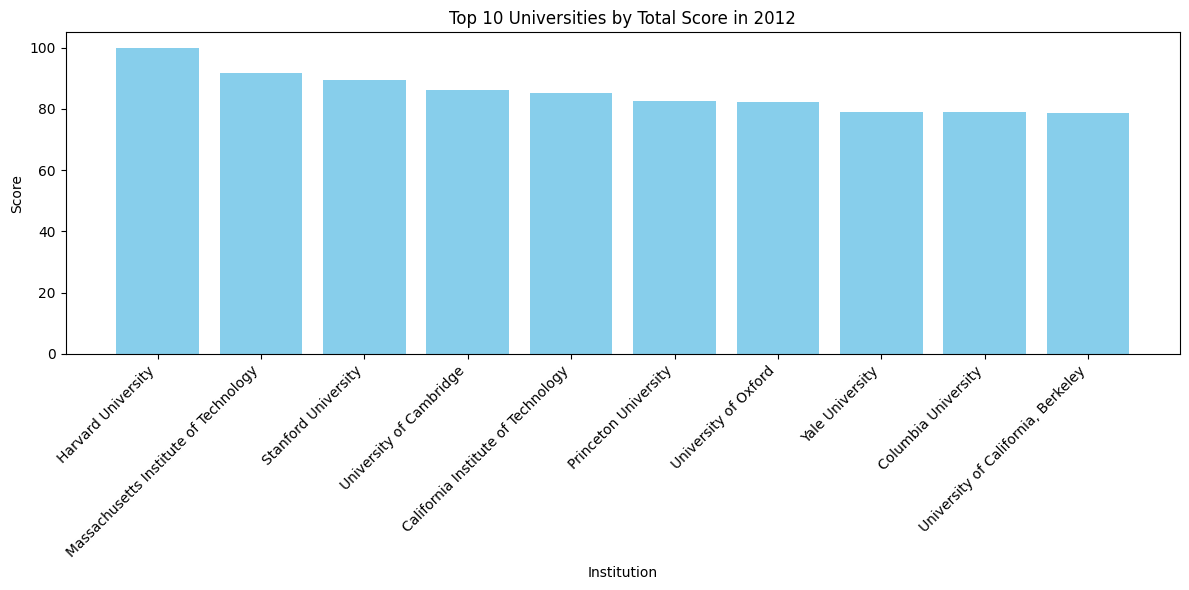

In [9]:
df2012 = World_ranking_universities[World_ranking_universities['Year'] == 2012]

top10_2012 = df2012.sort_values(by='Score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_2012['Institution'], top10_2012['Score'], color='skyblue')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Institution')
plt.ylabel('Score')
plt.title('Top 10 Universities by Total Score in 2012')

plt.tight_layout()
plt.show()


2.Create a line plot using seaborn to visualize the
trend of scores for the University of Tokyo from
2012 to 2014.

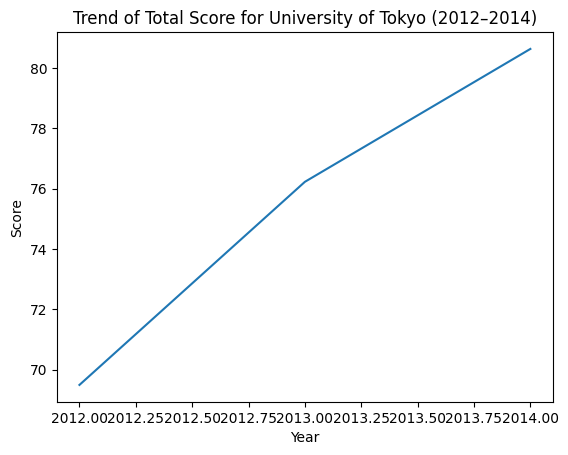

In [95]:
Tokyoscores = World_ranking_universities[(World_ranking_universities['Institution'] == 'University of Tokyo') & World_ranking_universities['Year'].between(2012,2014)]

plt.Figure(figsize=(8, 5))
sns.lineplot(data=Tokyoscores, x='Year', y='Score', markers='o')

plt.title('Trend of Total Score for University of Tokyo (2012–2014)')

plt.xlabel('Year')
plt.ylabel('Score')
plt.show()



3.How can you use Altair to create a scatter plot
comparing the quality of faculty and alumni
employment for all universities in 2013?

In [96]:
import altair as alt

df_2013 = World_ranking_universities[World_ranking_universities['Year'] == 2013]

chart = alt.Chart(df_2013).mark_circle(size = 60).encode(
    x ='Quality_Of_Faculty',
    y ='Alumni_Employment' ,
    color='Country',          # optional: color by country
    tooltip=['Institution', 'Quality_Of_Faculty', 'Alumni_Employment', 'Country']
).properties(
    title='Quality of Faculty vs Alumni Employment (2013)',
    width=600,
    height=400
).interactive()

chart


alt.Chart(...)

4.Using matplotlib, create a horizontal bar chart to
display the top 10 universities in terms of
influence in 2014.

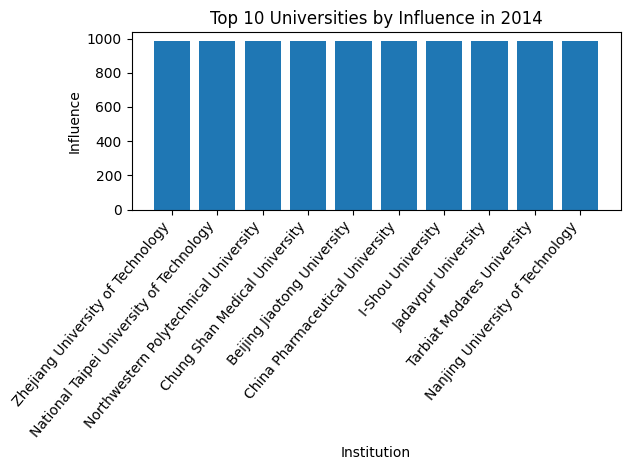

In [97]:
data2014 = World_ranking_universities[World_ranking_universities['Year'] == 2014]

top10_universities = data2014.sort_values(by='Influence',ascending=False).head(10)

plt.Figure(figsize=(15,9))
plt.bar(top10_universities['Institution'], top10_universities['Influence'])

plt.xticks(rotation=50, ha='right')
plt.xlabel('Institution')
plt.ylabel('Influence')
plt.title('Top 10 Universities by Influence in 2014')

plt.tight_layout()
plt.show()

5.How can you use seaborn to create a boxplot for
the distribution of scores among universities in
2012?

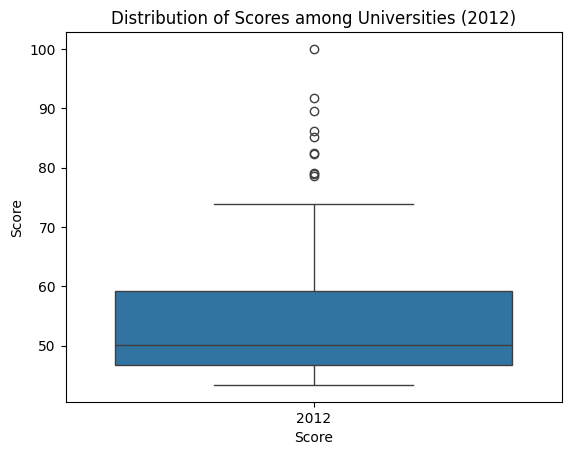

In [98]:
data2012 = World_ranking_universities[World_ranking_universities['Year'] == 2012]

plt.Figure(figsize=(8,5))
sns.boxplot(data=data2012,x='Year', y='Score')


plt.title('Distribution of Scores among Universities (2012)')
plt.xlabel('Score')

plt.show()

6.Create a stacked area plot using Altair to
represent the change in scores for the top 5
universities from 2012 to 2014.

In [99]:
df_2012_2014 = World_ranking_universities[
    World_ranking_universities['Year'].between(2012, 2014)
]

top5_in_2012 = (
    df_2012_2014[df_2012_2014['Year'] == 2012]
    .nlargest(5, 'Score')['Institution']
)

top5_df = df_2012_2014[df_2012_2014['Institution'].isin(top5_in_2012)]

chart = (
    alt.Chart(top5_df)
    .mark_area()
    .encode(
        x='Year:O',  
        y='Score:Q',
        color='Institution:N',
        tooltip=['Institution', 'Year', 'Score']
    )
    .properties(
        title='Change in Scores for Top 5 Universities (2012–2014)',
        width=600,
        height=400
    )
)

chart


alt.Chart(...)

7.How can you use matplotlib to create a pie chart
illustrating the distribution of universities in the
United States and other countries in 2013?

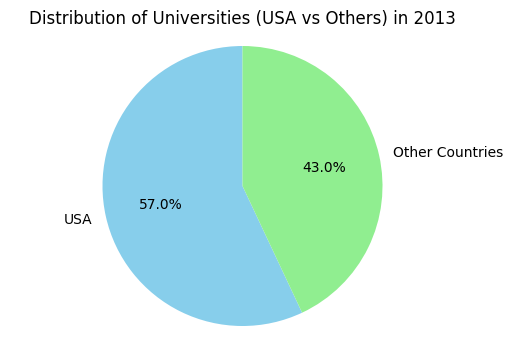

In [100]:
data2013 = World_ranking_universities[World_ranking_universities['Year'] == 2013]

USA_count = (data2013['Country'] == 'USA').sum()
OtherCounts = (data2013['Country'] != 'USA').sum()

labels = ['USA', 'Other Countries']
sizes = [USA_count, OtherCounts]
colors = ['skyblue', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(6,4))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
plt.title('Distribution of Universities (USA vs Others) in 2013')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

8.Using seaborn, create a violin plot to show the
distribution of alumni employment scores among
universities in 2014.


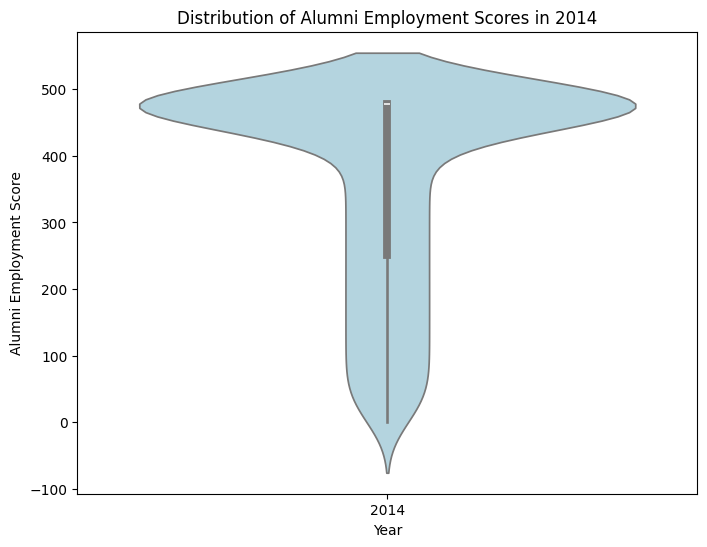

In [10]:
data_2014 = World_ranking_universities[World_ranking_universities['Year'] == 2014]

plt.figure(figsize=(8, 6))
sns.violinplot(
    x='Year',
    y='Alumni_Employment',
    data=data_2014,
    inner='box',       
    color='lightblue'
)

plt.title('Distribution of Alumni Employment Scores in 2014')
plt.xlabel('Year')
plt.ylabel('Alumni Employment Score')
plt.show()

9.How can you use Altair to create a bar chart for
the top 10 universities with the highest scores in
2014?

In [102]:
df1_2014 = World_ranking_universities[World_ranking_universities['Year'] == 2014]
top10_2014 = df_2014.nlargest(10, 'Score')

# Create the bar chart
chart = alt.Chart(top10_2014).mark_bar().encode(
    x=alt.X('Score:Q', title='Score'),
    y=alt.Y('Institution:N', sort='-x', title='University'),
    tooltip=['Institution', 'Score']
).properties(
    title='Top 10 Universities by Score in 2014',
    width=600,
    height=400
)

chart

alt.Chart(...)

10.Create a scatter plot using matplotlib to
visualize the correlation between the quality of
education and the quality of faculty for all
universities in 2012.

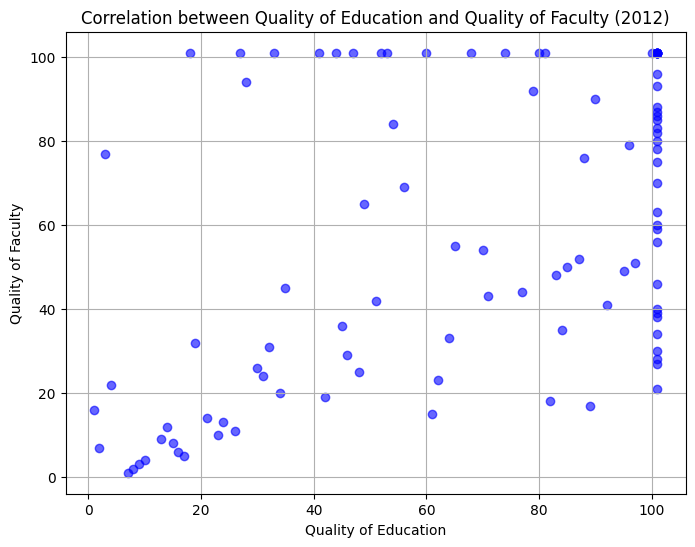

In [103]:
df1_2012 = World_ranking_universities[World_ranking_universities['Year'] == 2012]

plt.figure(figsize=(8, 6))
plt.scatter(df1_2012['Quality_Of_Education'], df1_2012['Quality_Of_Faculty'], color='blue', alpha=0.6)

plt.xlabel('Quality of Education')
plt.ylabel('Quality of Faculty')
plt.title('Correlation between Quality of Education and Quality of Faculty (2012)')
plt.grid(True)

plt.show()



11.How can you use seaborn to create a pair plot
to visualize the relationships between the scores,
influence, and citations for the top 10 universities
in 2013?

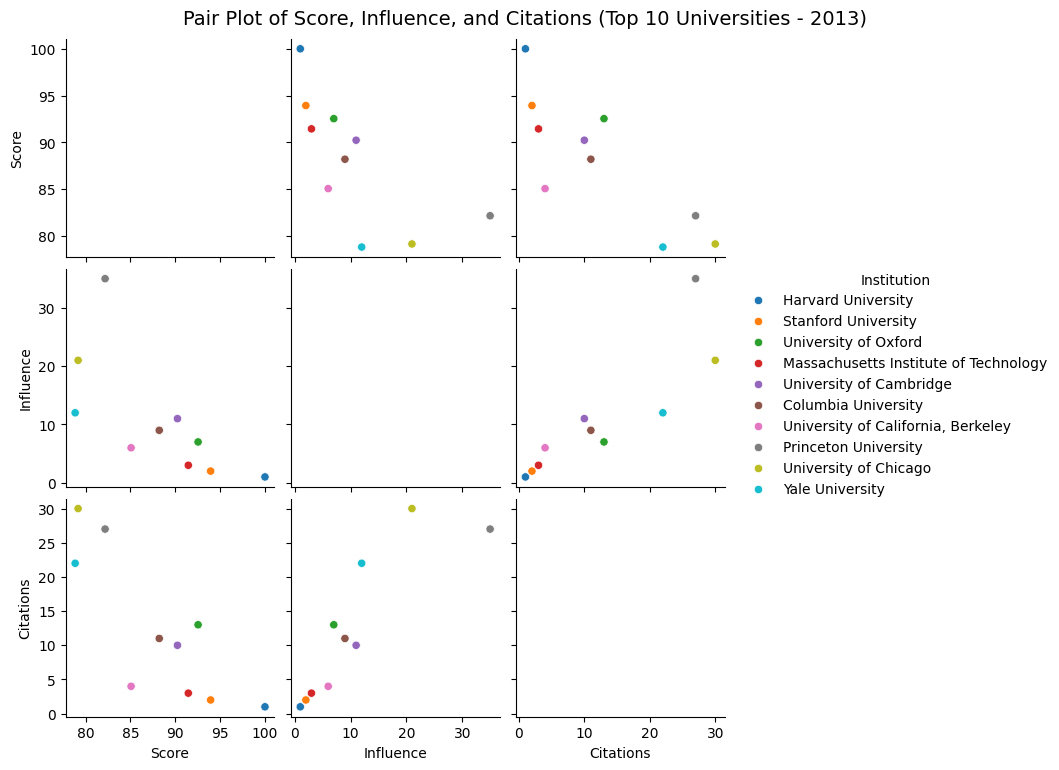

In [104]:
data2013

top10_2013 = data2013.sort_values(by=['Score','Influence', 'Citations'], ascending=[False, False, False]).head(10)

sns.pairplot(top10_2013, vars=['Score','Influence','Citations'],
             kind='scatter', hue='Institution')

plt.suptitle('Pair Plot of Score, Influence, and Citations (Top 10 Universities - 2013)', 
             y=1.02, fontsize=14)

plt.show()

12.Using Altair, create a bar chart to compare
the scores of universities in the United States and
the United Kingdom in 2014.

In [105]:
data2014

us_uk_2014 = data2014[data2014['Country'].isin(['USA', 'United Kingdom'])]

# Create bar chart
chart = alt.Chart(us_uk_2014).mark_bar().encode(
    x=alt.X('University:N', sort='-y', title='University'),
    y=alt.Y('Score:Q', title='Score'),
    color='Country:N',
    tooltip=['Institution', 'Country', 'Score']
).properties(
    title='Scores of Universities in the United States and United Kingdom (2014)',
    width=600,
    height=400
).interactive()

chart



alt.Chart(...)

13.How can you use matplotlib to create a
stacked bar chart illustrating the distribution of
universities in different countries in 2012?

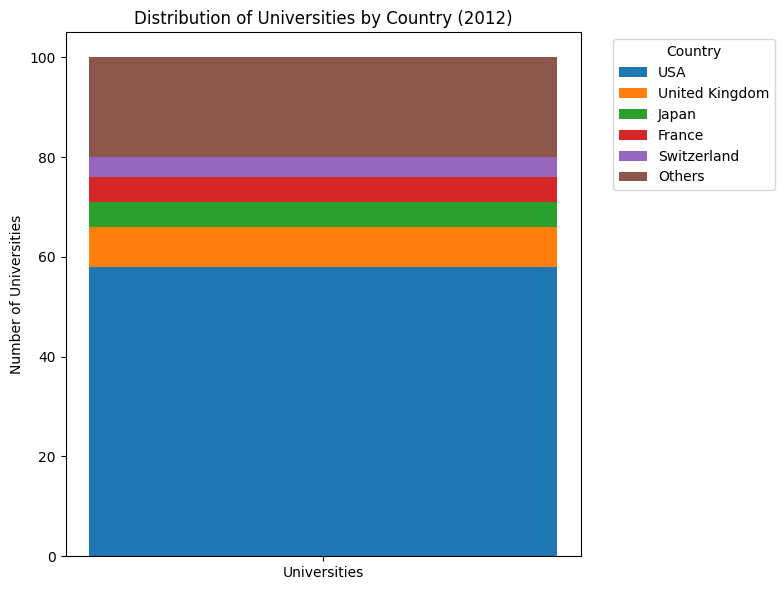

In [106]:
country_counts = data2012['Country'].value_counts()

df_country = country_counts.reset_index()
df_country.columns = ['Country', 'Count']

top_countries = df_country.head(5)  # top 5
others = pd.DataFrame({
    'Country': ['Others'],
    'Count': [df_country['Count'][5:].sum()]
})
stack_data = pd.concat([top_countries, others], ignore_index=True)

plt.figure(figsize=(8, 6))
plt.bar(
    ['Universities'],           
    stack_data['Count'].iloc[0],
    label=stack_data['Country'].iloc[0]
)

bottom = stack_data['Count'].iloc[0]
for i in range(1, len(stack_data)):
    plt.bar(
        ['Universities'],
        stack_data['Count'].iloc[i],
        bottom=bottom,
        label=stack_data['Country'].iloc[i]
    )
    bottom += stack_data['Count'].iloc[i]

plt.title('Distribution of Universities by Country (2012)')
plt.ylabel('Number of Universities')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

14.Create a heatmap using seaborn to visualize
the correlation matrix of the numerical columns in
the dataset.

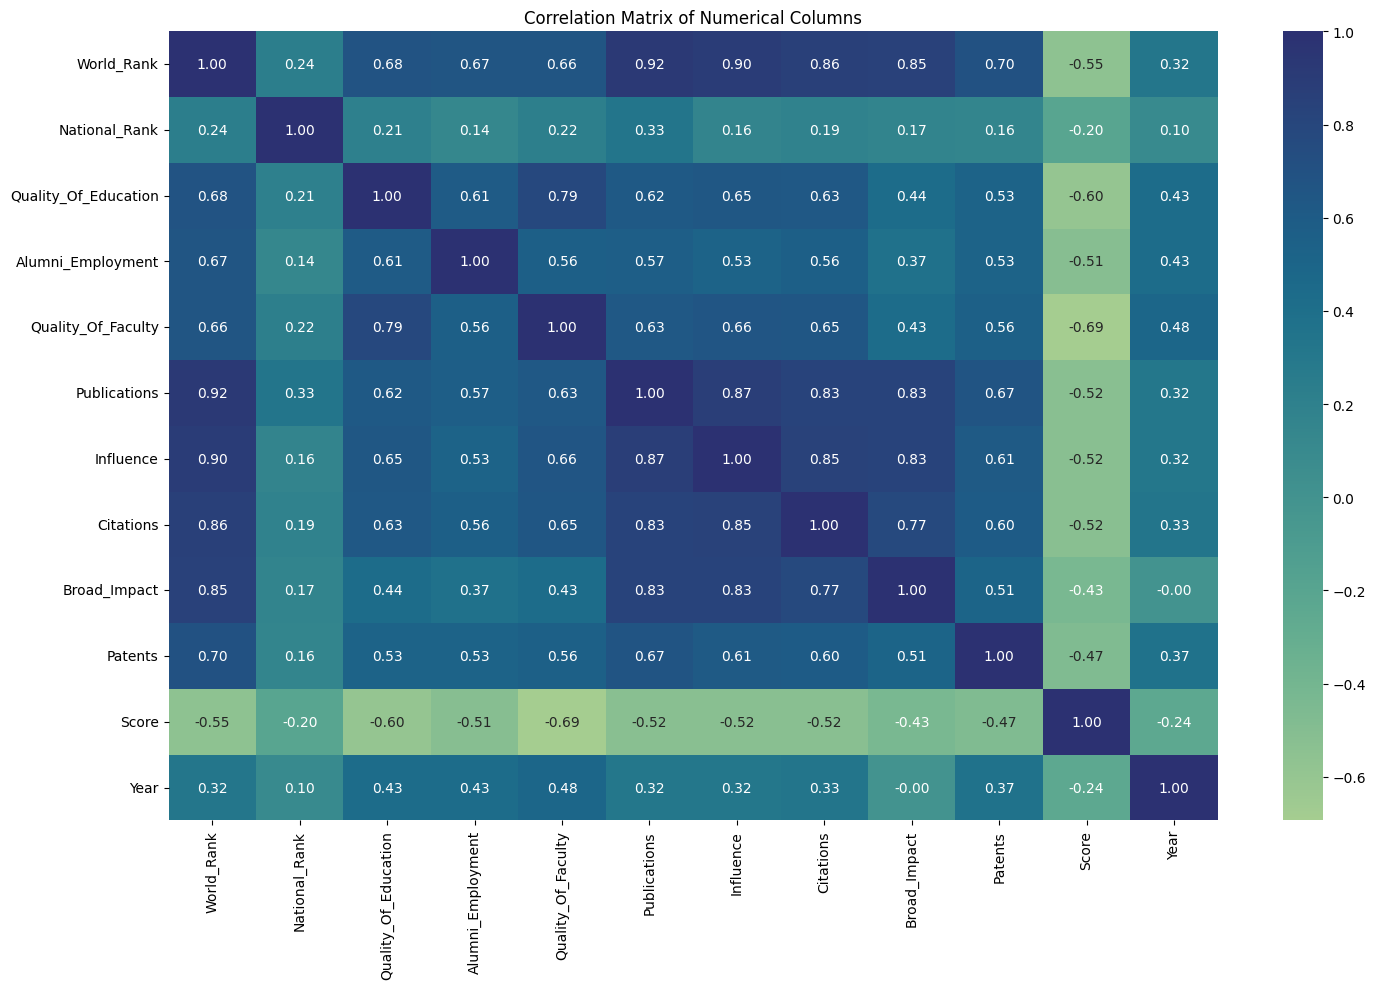

In [107]:
numeric_data = World_ranking_universities.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest')

plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()

15.How can you use Altair to create a line chart
showing the trend of scores for the top 5
universities in 2014?

In [108]:
top5_2014 = data2014.sort_values(by='Score', ascending=False).head(5)

top5_names = top5_2014['Institution'].unique()
trend_data = World_ranking_universities[World_ranking_universities['Institution'].isin(top5_names)]

chart = alt.Chart(trend_data).mark_line(point=True).encode(
    x='Year:O',
    y='Score:Q',
    color='Institution:N',
    tooltip=['Institution', 'Year', 'Score']
).properties(
    title='Trend of Scores for Top 5 Universities (selected from 2014)',
    width=600,
    height=400
)

chart


alt.Chart(...)

16.Using matplotlib, create a bar chart to show
the average scores for universities in each country
in 2013.

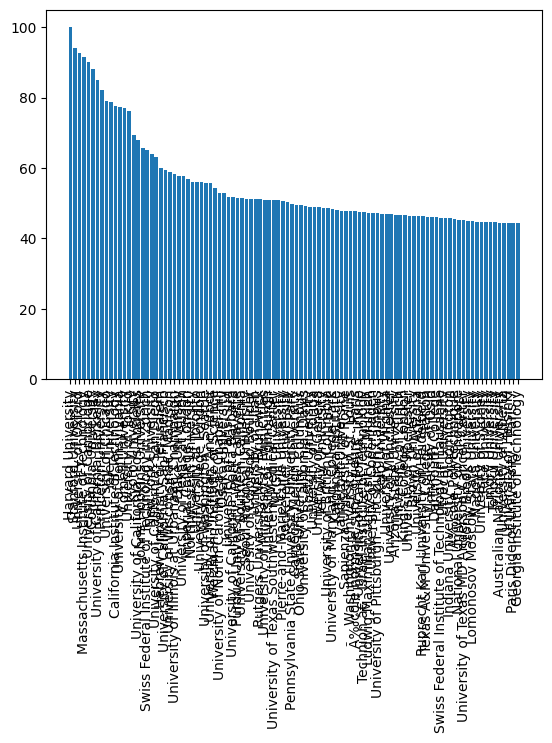

In [109]:
data2013

aveargescore = data2013.groupby(by='Institution')['Score'].mean().sort_values(ascending=False)

plt.Figure(figsize=(10,8))
plt.bar(aveargescore.index, aveargescore.values)

plt.xlabel = 'Institutions'
plt.ylabel = 'Score'
plt.xticks(rotation=90)
plt.show()

17.How can you use seaborn to create a swarm
plot to visualize the distribution of scores among
universities in 2014?

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Packages\Python

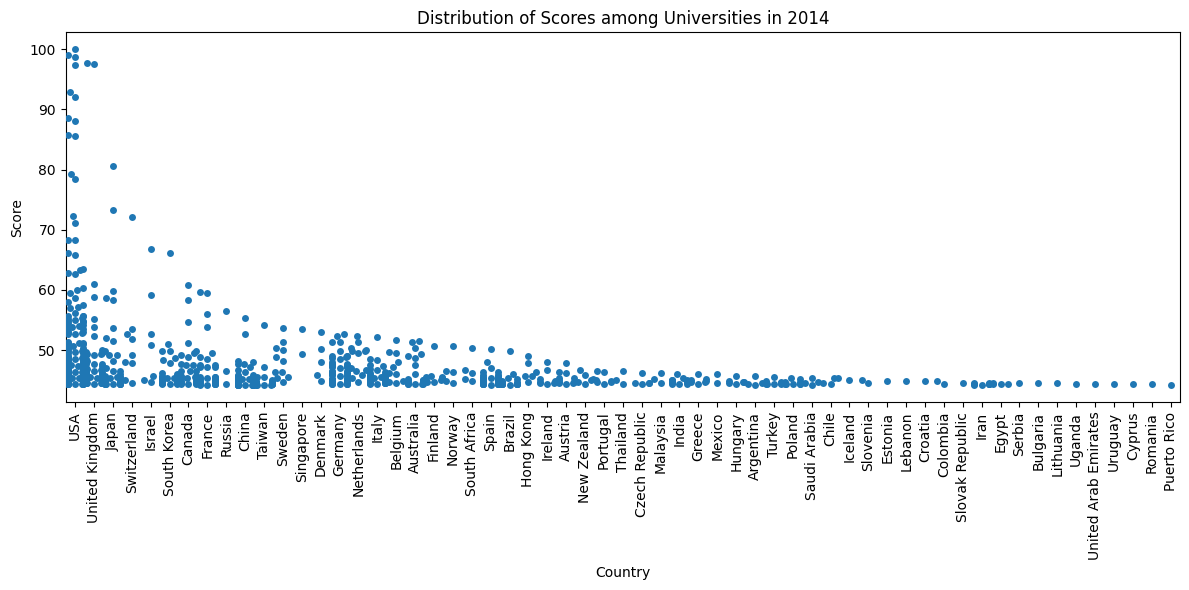

In [110]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Country', y='Score', data=data2014)

plt.xticks(rotation=90)
plt.xlabel='Country'
plt.ylabel='Score'
plt.title('Distribution of Scores among Universities in 2014')
plt.tight_layout()
plt.show()

18.Create a treemap using Altair to represent the
proportion of universities in each country in 2012.

In [111]:
country_counts = data2012['Country'].value_counts().reset_index()

country_counts.columns = ['Country', 'Count']
treemap = alt.Chart(country_counts).mark_rect().encode(
    x=alt.X('sum(Count):Q', stack='zero', axis=None),
    y=alt.Y('Country:N', sort='-x', axis=alt.Axis(title='Country')),
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='blues')),
    tooltip=['Country', 'Count']
).properties(
    width=600,
    height=400,
    title='Proportion of Universities by Country in 2012'
)

treemap

alt.Chart(...)

19.How can you use matplotlib to create a
histogram showing the distribution of scores for
all universities in 2014?

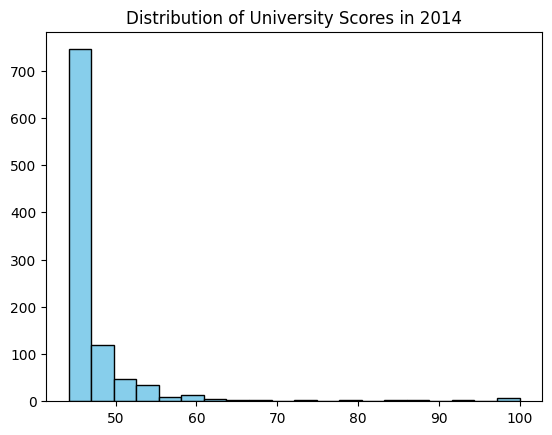

In [112]:
plt.Figure(figsize=(10,8))

plt.hist(data2014['Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel = 'Score'
plt.ylabel = 'Number of Universities'
plt.title('Distribution of University Scores in 2014')
plt.show()

20.Using Altair, create a bar chart to compare
the influence scores of universities in Canada and
Australia in 2013.


In [113]:
data2013

score_canada_austraia = data2013[(data2013['Country'] == 'Canada')|(data2013['Country'] == 'Australia')]
score_canada_austraia

chart = alt.Chart(score_canada_austraia).mark_bar().encode(
    x=alt.X('Institution:N', sort='-y', title='University',axis=alt.Axis(grid=False)),
    y=alt.Y('Influence:Q', title='Influence Score',axis=alt.Axis(grid=False)),
    color='Country:N',
    tooltip=['Institution', 'Country', 'Influence']
).properties(
    title='Influence Scores of Universities in Canada and Australia (2013)',
    width=500,
    height=400
)

chart.show()

alt.Chart(...)

In [114]:
World_ranking_universities.to_csv("cleaned_data.csv", index=False)
import os
print(os.getcwd())

c:\Users\user\Downloads\ASSIGNMENTS FILES
